In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d manishkc06/startup-success-prediction

Dataset URL: https://www.kaggle.com/datasets/manishkc06/startup-success-prediction
License(s): CC0-1.0
  0% 0.00/64.1k [00:00<?, ?B/s]
100% 64.1k/64.1k [00:00<00:00, 37.9MB/s]


In [4]:
!unzip /content/startup-success-prediction.zip

Archive:  /content/startup-success-prediction.zip
  inflating: startup data.csv        


# Importing the data

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_csv("/content/startup data.csv")
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


# Data Preprocessing and EDA

In [48]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [49]:
data = data.drop(["Unnamed: 0","latitude","longitude","id","Unnamed: 6","object_id"],axis=1)

In [50]:
data.columns

Index(['state_code', 'zip_code', 'city', 'name', 'labels', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   zip_code                  923 non-null    object 
 2   city                      923 non-null    object 
 3   name                      923 non-null    object 
 4   labels                    923 non-null    int64  
 5   founded_at                923 non-null    object 
 6   closed_at                 335 non-null    object 
 7   first_funding_at          923 non-null    object 
 8   last_funding_at           923 non-null    object 
 9   age_first_funding_year    923 non-null    float64
 10  age_last_funding_year     923 non-null    float64
 11  age_first_milestone_year  771 non-null    float64
 12  age_last_milestone_year   771 non-null    float64
 13  relationships             923 non-null    int64  
 14  funding_ro

In [52]:
data.shape

(923, 43)

In [53]:
data.is_software.value_counts()

is_software
0    770
1    153
Name: count, dtype: int64

In [54]:
data.isna().sum()

state_code                    0
zip_code                      0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biote

In [55]:
data = data.drop("closed_at",axis = 1)
data.isna().sum()

state_code                    0
zip_code                      0
city                          0
name                          0
labels                        0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consu

In [56]:
data = data.drop(["age_first_milestone_year","age_last_milestone_year"],axis = 1)

In [57]:
data.describe()

,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,0.646804,2.235630,3.931456,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,0.478222,2.510449,2.967910,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,0.000000,-9.046600,-9.046600,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.576700,1.669850,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,1.000000,1.446600,3.528800,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,1.000000,3.575350,5.560250,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1.000000,21.895900,21.895900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


# Feature selection using filter method

In [58]:
## Feature selection
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_code              923 non-null    object 
 1   zip_code                923 non-null    object 
 2   city                    923 non-null    object 
 3   name                    923 non-null    object 
 4   labels                  923 non-null    int64  
 5   founded_at              923 non-null    object 
 6   first_funding_at        923 non-null    object 
 7   last_funding_at         923 non-null    object 
 8   age_first_funding_year  923 non-null    float64
 9   age_last_funding_year   923 non-null    float64
 10  relationships           923 non-null    int64  
 11  funding_rounds          923 non-null    int64  
 12  funding_total_usd       923 non-null    int64  
 13  milestones              923 non-null    int64  
 14  state_code.1            922 non-null    ob

In [59]:
data.labels

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: labels, Length: 923, dtype: int64

In [60]:
## changing the datatypes from in to object if the column contains only 0 or 1
for col in data.columns:
  if data[col].nunique() == 2:
    data[col] = data[col].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_code              923 non-null    object 
 1   zip_code                923 non-null    object 
 2   city                    923 non-null    object 
 3   name                    923 non-null    object 
 4   labels                  923 non-null    object 
 5   founded_at              923 non-null    object 
 6   first_funding_at        923 non-null    object 
 7   last_funding_at         923 non-null    object 
 8   age_first_funding_year  923 non-null    float64
 9   age_last_funding_year   923 non-null    float64
 10  relationships           923 non-null    int64  
 11  funding_rounds          923 non-null    int64  
 12  funding_total_usd       923 non-null    int64  
 13  milestones              923 non-null    int64  
 14  state_code.1            922 non-null    ob

In [85]:
#changing the datatypes of first_funding_at,last_funding_at,founded_at,age_first_funding_year,age_last_funding_year in data to date datatype
date_cols = ["first_funding_at","last_funding_at","founded_at","age_first_funding_year","age_last_funding_year"]
for col in date_cols:
  data[col] = pd.to_datetime(data[col]).dt.date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state_code              923 non-null    object 
 1   zip_code                923 non-null    object 
 2   city                    923 non-null    object 
 3   name                    923 non-null    object 
 4   labels                  923 non-null    object 
 5   founded_at              923 non-null    object 
 6   first_funding_at        923 non-null    object 
 7   last_funding_at         923 non-null    object 
 8   age_first_funding_year  923 non-null    object 
 9   age_last_funding_year   923 non-null    object 
 10  relationships           923 non-null    int64  
 11  funding_rounds          923 non-null    int64  
 12  funding_total_usd       923 non-null    int64  
 13  milestones              923 non-null    int64  
 14  state_code.1            922 non-null    ob

In [86]:
data.head()

,state_code,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,1970-01-01,1970-01-01,...,1,0,1,0,0,0,0,1.0000,0,1
1,CA,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,1970-01-01,1970-01-01,...,0,1,0,0,1,1,1,4.7500,1,1
2,CA,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,1970-01-01,1970-01-01,...,0,0,0,1,0,0,0,4.0000,1,1
3,CA,95014,Cupertino,Solidcore Systems,1,2002-01-01,2005-02-17,2007-04-25,1970-01-01,1970-01-01,...,0,0,0,0,1,1,1,3.3333,1,1
4,CA,94105,San Francisco,Inhale Digital,0,2010-08-01,2010-08-01,2012-04-01,1970-01-01,1970-01-01,...,0,1,1,0,0,0,0,1.0000,1,0


In [62]:
data.status

0      acquired
1      acquired
2      acquired
3      acquired
4        closed
         ...   
918    acquired
919      closed
920      closed
921    acquired
922    acquired
Name: status, Length: 923, dtype: object

In [63]:
data["status"] = data["status"].map({"acquired":1,"closed":0})
#plot bar chart of status
data.status

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int64

<BarContainer object of 2 artists>

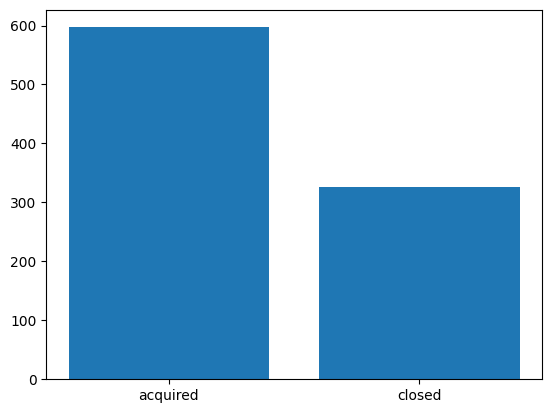

In [73]:
plt.bar(["acquired","closed"],data.status.value_counts())

In [74]:
data.status.value_counts()

status
1    597
0    326
Name: count, dtype: int64

In [119]:
#filter method
#1. LDA for continous vs categorical
#2. Chisquare for categorical vs categorical
target = data.status
X = data.drop("status",axis=1)


## Multicollinearity

In [120]:
#Checking multicollinearity using correlation, VIF and conditional index
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
num_features = X.select_dtypes(include=np.number).columns
X_constant = add_constant(X[num_features])
vif = pd.Series([variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])],index=X_constant.columns)
vif


const                6.857638
relationships        1.504667
funding_rounds       1.161224
funding_total_usd    1.020380
milestones           1.366677
avg_participants     1.015008
dtype: float64

<Axes: >

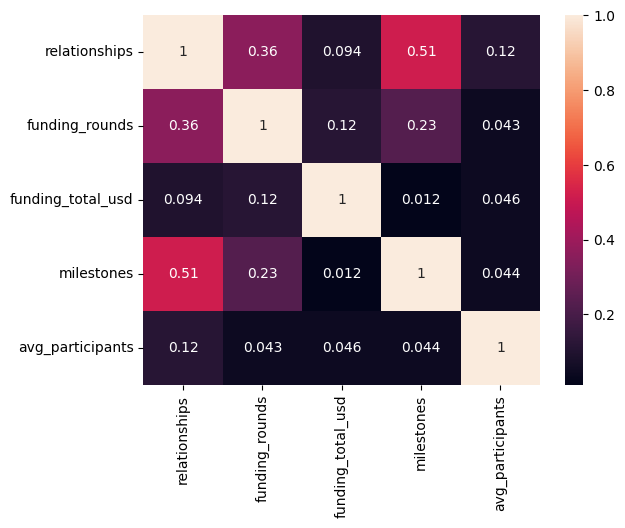

In [121]:
sns.heatmap(X[num_features].corr(),annot = True)

In [122]:
#observation:
"""
1. Milestones and relationships are highly correlated
2. Funding and Milestones are also highly correlated
remove milestones to handle multicollinearity
"""

'\n1. Milestones and relationships are highly correlated\n2. Funding and Milestones are also highly correlated\nremove milestones to handle multicollinearity\n'

In [123]:
X = X.drop("relationships",axis = 1)
X.head()

,state_code,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,CA,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,1970-01-01,1970-01-01,...,0,1,0,1,0,0,0,0,1.0000,0
1,CA,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,1970-01-01,1970-01-01,...,0,0,1,0,0,1,1,1,4.7500,1
2,CA,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,1970-01-01,1970-01-01,...,0,0,0,0,1,0,0,0,4.0000,1
3,CA,95014,Cupertino,Solidcore Systems,1,2002-01-01,2005-02-17,2007-04-25,1970-01-01,1970-01-01,...,0,0,0,0,0,1,1,1,3.3333,1
4,CA,94105,San Francisco,Inhale Digital,0,2010-08-01,2010-08-01,2012-04-01,1970-01-01,1970-01-01,...,0,0,1,1,0,0,0,0,1.0000,1


## Categorical feature selection using chi square test for independence of attributes

In [124]:
#categorical vs categorical test using chisquare
#using chisquare to select categorical variables
X.state_code.unique()

array(['CA', 'MA', 'KY', 'NY', 'CO', 'VA', 'TX', 'WA', 'IL', 'NC', 'PA',
       'GA', 'NH', 'MO', 'FL', 'NJ', 'WV', 'MI', 'DC', 'CT', 'MD', 'OH',
       'TN', 'MN', 'RI', 'OR', 'UT', 'ME', 'NV', 'NM', 'IN', 'AZ', 'ID',
       'AR', 'WI'], dtype=object)

In [125]:
X.columns

Index(['state_code', 'zip_code', 'city', 'name', 'labels', 'founded_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'funding_rounds', 'funding_total_usd',
       'milestones', 'state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500'],
      dtype='object')

In [126]:
X.category_code.unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [127]:
len(X.category_code.unique())

35

In [136]:
#We just have to encode category_code and drop all the is columns. Same applies for state_code
#label encoding for state_code and category_code column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["state_code"] = le.fit_transform(X["state_code"])
X["category_code"] = le.fit_transform(X["category_code"])


In [137]:
X["category_code"].unique()

array([19,  8, 34, 30, 11, 20, 10, 18,  7, 24, 27, 22, 23, 12,  6,  0, 33,
        9,  1,  5,  3,  4, 26, 28, 29, 16,  2, 17, 15, 14, 21, 32, 31, 25,
       13])

In [138]:
#dropping ['state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate','is_software', 'is_web', 'is_mobile','is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce','is_biotech', 'is_consulting', 'is_othercategory'] columns
X = X.drop(['state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate','is_software', 'is_web', 'is_mobile','is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce','is_biotech', 'is_consulting', 'is_othercategory'],axis=1)

In [139]:
X.head()

,state_code,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,...,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,2,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,1970-01-01,1970-01-01,...,3,19,0,1,0,0,0,0,1.0000,0
1,2,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,1970-01-01,1970-01-01,...,1,8,1,0,0,1,1,1,4.7500,1
2,2,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,1970-01-01,1970-01-01,...,2,34,0,0,1,0,0,0,4.0000,1
3,2,95014,Cupertino,Solidcore Systems,1,2002-01-01,2005-02-17,2007-04-25,1970-01-01,1970-01-01,...,1,30,0,0,0,1,1,1,3.3333,1
4,2,94105,San Francisco,Inhale Digital,0,2010-08-01,2010-08-01,2012-04-01,1970-01-01,1970-01-01,...,1,11,1,1,0,0,0,0,1.0000,1


In [140]:
X.columns

Index(['state_code', 'zip_code', 'city', 'name', 'labels', 'founded_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'funding_rounds', 'funding_total_usd',
       'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500'],
      dtype='object')

In [141]:
#dropping additional columns that are not important
X = X.drop(['state_code', 'zip_code', 'city', 'name', 'labels', 'founded_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year','avg_participants'],axis = 1)
X.head()

,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500
0,3,375000,3,19,0,1,0,0,0,0,0
1,4,40100000,1,8,1,0,0,1,1,1,1
2,1,2600000,2,34,0,0,1,0,0,0,1
3,3,40000000,1,30,0,0,0,1,1,1,1
4,2,1300000,1,11,1,1,0,0,0,0,1


In [142]:
X.shape

(923, 11)

In [143]:
categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index(['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC',
       'has_roundD', 'is_top500'],
      dtype='object')

In [144]:
#chisquare test to select features from categorical_features with respect to target variable
#H0: Features are independent
#H1: Features are not independent
from scipy.stats import chi2_contingency
significant_features = []
for col in categorical_features:
  contingency_table = pd.crosstab(X[col],target)
  chi2,p,dof,expected = chi2_contingency(contingency_table)
  print(f"{col} has a p-value of {p}")

  if (p>0.05):
    print(f"{col} is not significant")
  else:
    print(f"{col} is significant")
    significant_features.append(col)
print(significant_features)


has_VC has a p-value of 0.1002717915820268
has_VC is not significant
has_angel has a p-value of 0.03284964570383422
has_angel is significant
has_roundA has a p-value of 3.1926696185132406e-08
has_roundA is significant
has_roundB has a p-value of 3.936596627937053e-10
has_roundB is significant
has_roundC has a p-value of 7.093710162081346e-07
has_roundC is significant
has_roundD has a p-value of 3.5252864573566325e-05
has_roundD is significant
is_top500 has a p-value of 8.745372465224638e-21
is_top500 is significant
['has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'is_top500']


In [145]:
#Dropping has_VC from X
X = X.drop("has_VC",axis=1)
X.head()

,funding_rounds,funding_total_usd,milestones,category_code,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500
0,3,375000,3,19,1,0,0,0,0,0
1,4,40100000,1,8,0,0,1,1,1,1
2,1,2600000,2,34,0,1,0,0,0,1
3,3,40000000,1,30,0,0,1,1,1,1
4,2,1300000,1,11,1,0,0,0,0,1


# Train test split

In [182]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=42)

#Feature selection

In [183]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['funding_rounds', 'funding_total_usd', 'milestones']] = sc.fit_transform(X_train[['funding_rounds', 'funding_total_usd', 'milestones']])
X_test[['funding_rounds', 'funding_total_usd', 'milestones']] = sc.transform(X_test[['funding_rounds', 'funding_total_usd', 'milestones']])

In [184]:
X_train

,funding_rounds,funding_total_usd,milestones,category_code,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500
97,-0.942291,-0.101496,-0.631830,30,0,0,0,0,0,1
227,-0.942291,-0.118093,0.109490,6,0,1,0,0,0,1
692,-0.942291,-0.056448,-0.631830,30,0,0,0,0,1,1
587,-0.942291,-0.124732,-1.373151,34,1,0,0,0,0,0
883,-0.226848,-0.108609,-0.631830,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
106,0.488595,0.152196,0.850811,30,0,0,0,1,0,1
270,-0.226848,-0.051706,-1.373151,30,0,1,1,0,0,1
860,0.488595,-0.020945,0.109490,28,0,0,1,1,0,1
435,-0.226848,-0.116872,-1.373151,3,0,0,0,0,0,0


#Model building and evaluation

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = []
model_name =list(models.keys())
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  print(f"{list(models.keys())[i]}")
  print("Model performance for training set: ")
  print(f"-Training accuracy: {accuracy_score(y_train,y_pred_train)}")
  print(f"-Training f1 score: {f1_score(y_train,y_pred_train)}")
  print(f"-Training precision score: {precision_score(y_train,y_pred_train)}")
  print(f"-Training recall score: {recall_score(y_train,y_pred_train)}")
  print(f"-Training roc_auc_score: {roc_auc_score(y_train,y_pred_train)}")
  print("-"*35)
  print("Model performance for testing set: ")
  accuracy.append(accuracy_score(y_test,y_pred_test))
  print(f"-Testing accuracy: {accuracy_score(y_test,y_pred_test)}")
  print(f"-Testing f1 score: {f1_score(y_test,y_pred_test)}")
  print(f"-Testing precision score: {precision_score(y_test,y_pred_test)}")
  print(f"-Testing recall score: {recall_score(y_test,y_pred_test)}")
  print(f"-Testing roc_auc_score: {roc_auc_score(y_test,y_pred_test)}")
  print("*"*35)
  print("\n")
print(f"Max accuracy: {max(accuracy)}")
bestmodel = model_name[accuracy.index(max(accuracy))]
print(f"Best model: {bestmodel}")
print(f"{models[bestmodel].get_params()}")



Logistic Regression
Model performance for training set: 
-Training accuracy: 0.7560975609756098
-Training f1 score: 0.8305084745762712
-Training precision score: 0.7642980935875217
-Training recall score: 0.9092783505154639
-Training roc_auc_score: 0.6858644717004196
-----------------------------------
Model performance for testing set: 
-Testing accuracy: 0.745945945945946
-Testing f1 score: 0.8127490039840638
-Testing precision score: 0.7338129496402878
-Testing recall score: 0.9107142857142857
-Testing roc_auc_score: 0.7019324853228962
***********************************


KNN
Model performance for training set: 
-Training accuracy: 0.8170731707317073
-Training f1 score: 0.8651348651348653
-Training precision score: 0.8391472868217055
-Training recall score: 0.8927835051546392
-Training roc_auc_score: 0.7823601320239599
-----------------------------------
Model performance for testing set: 
-Testing accuracy: 0.6324324324324324
-Testing f1 score: 0.7166666666666668
-Testing precisio

#hyperparameter tuning

In [214]:
#the best model is gradient boosting with 76% accuracy
#hyperparameter tuning for gradient boosting model
gradient_params={"learning_rate":[0.05,0.1,0.15,0.2],
                 "loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error'],
             "min_samples_split": [2, 8, 10,15, 20,25,30],
             "n_estimators": [40,100,150, 200,300,400,500],
              "max_depth": [3,5, 8, 15, None, 10,20]
                }
gradient_params


{'learning_rate': [0.05, 0.1, 0.15, 0.2],
 'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error'],
 'min_samples_split': [2, 8, 10, 15, 20, 25, 30],
 'n_estimators': [40, 100, 150, 200, 300, 400, 500],
 'max_depth': [3, 5, 8, 15, None, 10, 20]}

In [215]:
randomcv_models = [
    ("GradientBoost", GradientBoostingClassifier(), gradient_params)
                   ]

In [216]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for GradientBoost -------------------
{'n_estimators': 40, 'min_samples_split': 15, 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}


In [225]:
## fitting the model with best params
gb = GradientBoostingClassifier(criterion='friedman_mse', loss='log_loss', max_depth=3, min_samples_split=2, n_estimators=100,learning_rate = 0.05)
gb.fit(X_train,y_train)
y_pred_test = gb.predict(X_test)
print("Model performance for testing set: ")
accuracy.append(accuracy_score(y_test,y_pred_test))
print(f"-Testing accuracy: {accuracy_score(y_test,y_pred_test)}")
print(f"-Testing f1 score: {f1_score(y_test,y_pred_test)}")
print(f"-Testing precision score: {precision_score(y_test,y_pred_test)}")
print(f"-Testing recall score: {recall_score(y_test,y_pred_test)}")
print(f"-Testing roc_auc_score: {roc_auc_score(y_test,y_pred_test)}")

Model performance for testing set: 
-Testing accuracy: 0.7567567567567568
-Testing f1 score: 0.830188679245283
-Testing precision score: 0.7189542483660131
-Testing recall score: 0.9821428571428571
-Testing roc_auc_score: 0.6965508806262231


#saving models

In [226]:
##saving the models as pkl files
#label encoder
import pickle
with open("label_encoder.pkl","wb") as f:
  pickle.dump(le,f)

#Scaler
with open("scaler.pkl","wb") as f:
  pickle.dump(sc,f)

#Gradient Boosting model
with open("gradient_boosting.pkl","wb") as f:
  pickle.dump(gb,f)



# End